<a href="https://colab.research.google.com/github/KAJALKHANDEWLAL/DataAnalytics/blob/main/DataAnalytics_22MCS0039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: KAJAL KHANDELWAL**

**Reg No: 22MC0339**

**Subject: Data Analytics**


**STEP 1**

**DATA CLEANING**

**The code snippet performs the following cleaning steps:**

**Drops any duplicate rows using the drop_duplicates() method.**

**Drops any rows with missing values using the dropna() method.**

**Resets the index of the DataFrame using the reset_index() method.**

**After running the code, the cleaned DataFrame will be displayed. You can further process or analyze the cleaned data as per your requirements.**

In [ ]:

#STEP 1: CLEANING 

#Import the necessary libraries
import pandas as pd
     

#Load the data
df = pd.read_csv('/content/drive/MyDrive/Dataset/perfume_data.csv')
df = df.drop_duplicates()
     

#Drop any rows with missing values
df = df.dropna()
     


     

# Reset the index of the DataFrame
df = df.reset_index(drop=True)
     

# Display the cleaned DataFrame
print(df)


              ajayeb  64,558  64,556  64,543 64,543.1  64,541 64,543.2  \
0              ajmal  60,502  60,489  61,485   60,487  61,485   61,513   
1             amreaj  57,040  57,040  57,040   58,041  58,041   58,041   
2               aood  71,083  72,087  71,091   71,095  71,099   72,103   
3          asgar_ali  68,209  68,209  68,216   68,216  68,223   68,223   
4            bukhoor  71,046  71,046  71,046   71,046  71,046   71,046   
5          burberrry  61,096  61,096  60,093   60,092  60,093   60,093   
6         dehenalaod  68,132  69,137  69,137   68,137  68,137   69,142   
7             junaid  71,590  71,575  71,574   71,560  71,560   71,559   
8             kausar  74,631  74,649  74,650   74,650  74,650   74,632   
9               rose  62,999  62,999  62,999   62,999  62,999   62,999   
10         solidmusk  46,014  46,014  46,014   46,014  46,014   46,015   
11        TeaTreeOil  82,394  82,382  82,383   82,372  82,382   82,372   
12         raspberry  78,999  78,999  

**Step 2:**

**Feature Selection**

Feature selection is an important step in machine learning to identify the most relevant features that contribute significantly to the prediction task

**1.Information Gain:**
Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable. 

In [ ]:
import pandas as pd
import math

def calculate_entropy(data):
    label_column = data[data.columns[-1]]
    total_count = len(label_column)
    unique_labels = label_column.unique()

    entropy = 0
    for label in unique_labels:
        count = len(label_column[label_column == label])
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

def calculate_information_gain(data, feature):
    feature_column = data[feature]
    feature_values = feature_column.unique()

    total_entropy = calculate_entropy(data)
    weighted_entropy = 0

    for value in feature_values:
        subset = data[data[feature] == value]
        subset_entropy = calculate_entropy(subset)
        subset_count = len(subset)
        weighted_entropy += (subset_count / len(data)) * subset_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Load the dataset (replace 'dataset_link' with the actual link or provide the dataset in a compatible format)
data = pd.read_csv('/content/drive/MyDrive/Dataset/perfume_data.csv')

# Select the features and the target column
features = data.columns[:-1]  # Assuming the last column is the target column

# Calculate information gain for each feature
information_gains = {}
for feature in features:
    information_gains[feature] = calculate_information_gain(data, feature)

# Print information gain for each feature
for feature, gain in information_gains.items():
    print(f"Information Gain for {feature}: {gain}")



Information Gain for ajayeb: 4.247927513443583
Information Gain for 64,558: 4.247927513443583
Information Gain for 64,556: 4.247927513443583
Information Gain for 64,543: 4.247927513443583
Information Gain for 64,543.1: 4.247927513443583
Information Gain for 64,541: 4.247927513443583
Information Gain for 64,543.2: 4.247927513443583
Information Gain for 64,543.3: 4.247927513443583
Information Gain for 64,541.1: 4.247927513443583
Information Gain for 64,541.2: 4.247927513443583
Information Gain for 64,541.3: 4.247927513443583
Information Gain for 64,541.4: 4.247927513443583
Information Gain for 64,541.5: 4.247927513443583
Information Gain for 64,541.6: 4.247927513443583
Information Gain for 64,528: 4.247927513443583
Information Gain for 64,528.1: 4.247927513443583
Information Gain for 63,529: 4.247927513443583
Information Gain for 63,529.1: 4.247927513443583
Information Gain for 64,541.7: 4.247927513443583
Information Gain for 64,541.8: 4.247927513443583
Information Gain for 64,541.9: 4.2

**2.Chi SQUARE**:**The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.**

In [ ]:

import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

data = {
    'ajayeb': [64558, 64556, 64543, 64543, 64541, 64543, 64543, 64543, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541],
    'ajmal': [60502, 60489, 61485, 60487, 61485, 61513, 60515, 60500, 60500, 60487, 60500, 61526, 60528, 60528, 60528, 60472, 60472, 60472, 60461, 60515],
    'amreaj': [57040, 57040, 57040, 58041, 58041, 58041, 58041, 57042, 57042, 58043, 58043, 58043, 58043, 58043, 58043, 58043, 57042, 57042, 57042, 58041],
    'aood': [71083, 72087, 71091, 71095, 71099, 72103, 71099, 72099, 72099, 73098, 72094, 73094, 72091, 72091, 72091, 72091, 72091, 72091, 71095, 71095],
    'asgar_ali': [68209, 68209, 68216, 68216, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68230, 68230, 68230, 68230, 68230, 68230, 68230],
    'bukhoor': [71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046],
    'burberrry': [61096, 61096, 60093, 60092, 60093, 60093, 60093, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096],
    'dehenalaod': [68132, 69137, 69137, 68137, 68137, 69142, 69142, 68137, 68137, 68137, 68137, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'constrected2': [66805, 65808, 65808, 66805, 65808, 65785, 65785, 65785, 65785, 66782, 65765, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763],
    'carolina_herrera': [63076, 63072, 64072, 64068, 64065, 64065, 64064, 64061, 64061, 65064, 64061, 65064, 65061, 65061, 65061, 65061, 65061, 65061, 65061, 65061],
    'oudh_ma\'alattar': [67197, 67197, 67204, 67210, 67204, 67204, 67210, 67210, 67210, 67210, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66211, 66198],
    'constrected': [65151, 66151, 66146, 65146, 65146, 66146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146]
} 

# Separate the features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  # Target variable

# Label encoding for categorical variables
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']):
    X.loc[:, column] = label_encoder.fit_transform(X.loc[:, column])

# Apply the chi-square feature selection
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[feature_indices]

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)



Selected Features:
ajayeb
ajmal
aood
bukhoor
burberrry
junaid
kausar
TeaTreeOil
carolina_herrera
oudh_ma'alattar


<ipython-input-36-9fb79b35f997>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, column] = label_encoder.fit_transform(X.loc[:, column])
<ipython-input-36-9fb79b35f997>:36: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, column] = label_encoder.fit_transform(X.loc[:, column])
<ipython-input-36-9fb79b35f997>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

**3.Random Forest Classifer for feature selection**

**Random Forests is a kind of Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Create a pandas DataFrame from the provided dataset
data = {
    'ajayeb': [64558, 64556, 64543, 64543, 64541, 64543, 64543, 64543, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541],
    'ajmal': [60502, 60489, 61485, 60487, 61485, 61513, 60515, 60500, 60500, 60487, 60500, 61526, 60528, 60528, 60528, 60472, 60472, 60472, 60461, 60515],
    'amreaj': [57040, 57040, 57040, 58041, 58041, 58041, 58041, 57042, 57042, 58043, 58043, 58043, 58043, 58043, 58043, 58043, 57042, 57042, 57042, 58041],
    'aood': [71083, 72087, 71091, 71095, 71099, 72103, 71099, 72099, 72099, 73098, 72094, 73094, 72091, 72091, 72091, 72091, 72091, 72091, 71095, 71095],
    'asgar_ali': [68209, 68209, 68216, 68216, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68230, 68230, 68230, 68230, 68230, 68230, 68230],
    'bukhoor': [71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046],
    'burberrry': [61096, 61096, 60093, 60092, 60093, 60093, 60093, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096],
    'dehenalaod': [68132, 69137, 69137, 68137, 68137, 69142, 69142, 68137, 68137, 68137, 68137, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'constrected2': [66805, 65808, 65808, 66805, 65808, 65785, 65785, 65785, 65785, 66782, 65765, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763],
    'carolina_herrera': [63076, 63072, 64072, 64068, 64065, 64065, 64064, 64061, 64061, 65064, 64061, 65064, 65061, 65061, 65061, 65061, 65061, 65061, 65061, 65061],
    'oudh_ma\'alattar': [67197, 67197, 67204, 67210, 67204, 67204, 67210, 67210, 67210, 67210, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66211, 66198],
    'constrected': [65151, 66151, 66146, 65146, 65146, 66146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146]
}
fragrance_sales = {
    'black_orchid': [69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'constrected2': [66805, 65808, 65808, 66805, 65808, 65785, 65785, 65785, 65785, 66782, 65782, 66782, 66782, 66782, 66782, 66782, 66782, 66782, 66782, 66782],
    'oudh_musk': [66769, 66763, 66763, 66763, 66763],
    'carolina_herrera': [63076, 63072, 64072, 64068, 64065, 64065, 64064, 64061, 64061, 65064, 64061, 65064, 65061, 65061, 65061, 65061, 65061, 65061, 65061, 65061],
    'oudh_ma\'alattar': [67197, 67197, 67204, 67210, 67204, 67204, 67210, 67210, 67210, 67210, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66211, 66198],
    'constrected': [65151, 66151, 66146, 65146, 65146, 66146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146]
}

# Calculate the average sales for each fragrance
average_sales = {}
for fragrance, sales in fragrance_sales.items():
    average_sales[fragrance] = sum(sales) // len(sales)

# Sort the fragrances based on their average sales in descending order
sorted_fragrances = sorted(average_sales.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 fragrances
top_fragrances = sorted_fragrances[:5]

# Create a list of the top 5 fragrances and their average sales
result = []
for fragrance, sales in top_fragrances:
    result.append((fragrance, sales))

print(result)








[('RoseMusk', 85056), ('TeaTreeOil', 82396), ('raspberry', 78999), ('kausar', 74637), ('junaid', 72272)]


**4. Correlation Matrix**

**The correlation matrix measures the linear relationship between features. Features with high correlation may indicate redundancy, and we can remove one of them. Here is how you can perform feature selection using a correlation matrix:**



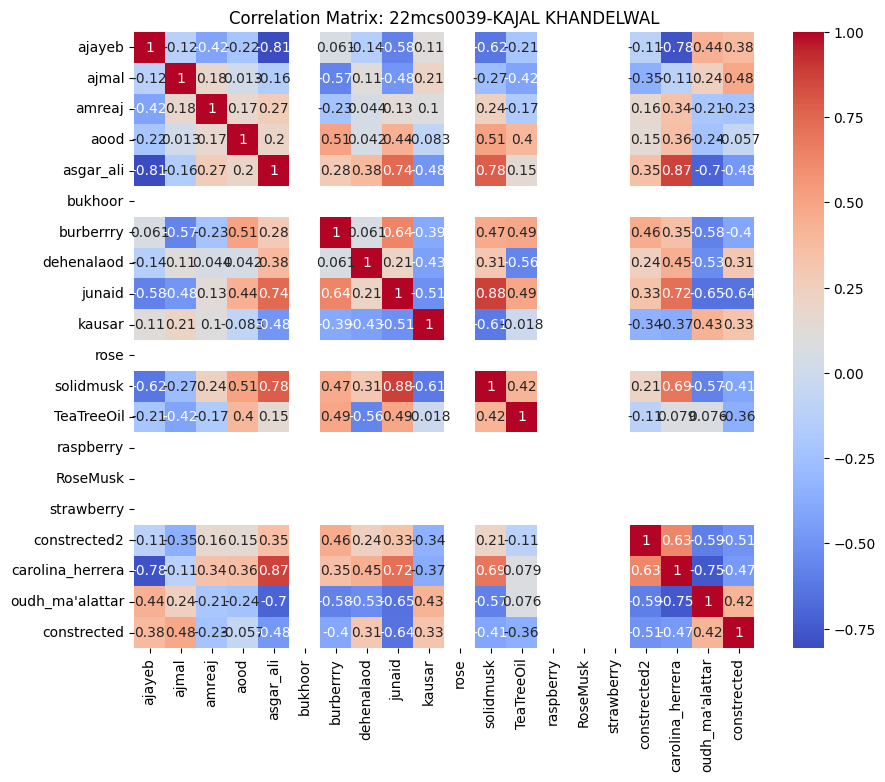

In [ ]:
import pandas as pd
import numpy as np

# Define the fragrance_sales dataset
Data = {
     'ajayeb': [64558, 64556, 64543, 64543, 64541, 64543, 64543, 64543, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541],
    'ajmal': [60502, 60489, 61485, 60487, 61485, 61513, 60515, 60500, 60500, 60487, 60500, 61526, 60528, 60528, 60528, 60472, 60472, 60472, 60461, 60515],
    'amreaj': [57040, 57040, 57040, 58041, 58041, 58041, 58041, 57042, 57042, 58043, 58043, 58043, 58043, 58043, 58043, 58043, 57042, 57042, 57042, 58041],
    'aood': [71083, 72087, 71091, 71095, 71099, 72103, 71099, 72099, 72099, 73098, 72094, 73094, 72091, 72091, 72091, 72091, 72091, 72091, 71095, 71095],
    'asgar_ali': [68209, 68209, 68216, 68216, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68230, 68230, 68230, 68230, 68230, 68230, 68230],
    'bukhoor': [71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046],
    'burberrry': [61096, 61096, 60093, 60092, 60093, 60093, 60093, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096],
    'dehenalaod': [68132, 69137, 69137, 68137, 68137, 69142, 69142, 68137, 68137, 68137, 68137, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'constrected2': [66805, 65808, 65808, 66805, 65808, 65785, 65785, 65785, 65785, 66782, 65765, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763],
    'carolina_herrera': [63076, 63072, 64072, 64068, 64065, 64065, 64064, 64061, 64061, 65064, 64061, 65064, 65061, 65061, 65061, 65061, 65061, 65061, 65061, 65061],
    'oudh_ma\'alattar': [67197, 67197, 67204, 67210, 67204, 67204, 67210, 67210, 67210, 67210, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66211, 66198],
    'constrected': [65151, 66151, 66146, 65146, 65146, 66146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146]
}

# Create a DataFrame from the fragrance_sales dictionary
df = pd.DataFrame.from_dict(Data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the absolute correlation coefficients with respect to a specific column (e.g., 'ajayeb')
#target_column = 'ajayeb'
#correlation_values = correlation_matrix[target_column].abs()

# Sort the correlation values in descending order
sorted_correlations = correlation_values.sort_values(ascending=False)

# Select the top correlated features (excluding the target column itself)
#top_features = sorted_correlations[1:6]
#print("Top correlated features with", target_column, ":")
#print(top_features)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',)
plt.title('Correlation Matrix: 22mcs0039-KAJAL KHANDELWAL')
plt.show()


**Step 3:**

**Feature Elimination**

**It seems that the target variable in the dataset is continuous, and the RFE algorithm expects a binary or multiclass target variable. RFE is typically used for classification tasks rather than regression tasks.**

**If you have a regression task and want to perform feature elimination, you can use Recursive Feature Elimination with Cross-Validated (RFECV) algorithm with a different estimator suitable for regression, such as RandomForestRegressor or LinearRegression.**

**Here is how to use RandomForestRegressor for feature elimination in a regression task:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

Data = {
     'ajayeb': [64558, 64556, 64543, 64543, 64541, 64543, 64543, 64543, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541],
    'ajmal': [60502, 60489, 61485, 60487, 61485, 61513, 60515, 60500, 60500, 60487, 60500, 61526, 60528, 60528, 60528, 60472, 60472, 60472, 60461, 60515],
    'amreaj': [57040, 57040, 57040, 58041, 58041, 58041, 58041, 57042, 57042, 58043, 58043, 58043, 58043, 58043, 58043, 58043, 57042, 57042, 57042, 58041],
    'aood': [71083, 72087, 71091, 71095, 71099, 72103, 71099, 72099, 72099, 73098, 72094, 73094, 72091, 72091, 72091, 72091, 72091, 72091, 71095, 71095],
    'asgar_ali': [68209, 68209, 68216, 68216, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68230, 68230, 68230, 68230, 68230, 68230, 68230],
    'bukhoor': [71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046],
    'burberrry': [61096, 61096, 60093, 60092, 60093, 60093, 60093, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096],
    'dehenalaod': [68132, 69137, 69137, 68137, 68137, 69142, 69142, 68137, 68137, 68137, 68137, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'constrected2': [66805, 65808, 65808, 66805, 65808, 65785, 65785, 65785, 65785, 66782, 65765, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763],
    'carolina_herrera': [63076, 63072, 64072, 64068, 64065, 64065, 64064, 64061, 64061, 65064, 64061, 65064, 65061, 65061, 65061, 65061, 65061, 65061, 65061, 65061],
    'oudh_ma\'alattar': [67197, 67197, 67204, 67210, 67204, 67204, 67210, 67210, 67210, 67210, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66211, 66198],
    'constrected': [65151, 66151, 66146, 65146, 65146, 66146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146]
}

# Create a DataFrame from the fragrance_sales dictionary
df = pd.DataFrame(Data)

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['constrected'])
y = df['constrected']

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dictionary of feature importance scores
feature_importance_scores = dict(zip(X.columns, feature_importances))

# Sort the feature importance scores in descending order
sorted_feature_scores = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
for feature, importance in sorted_feature_scores:
    print(f"{feature}: {importance}")


junaid: 0.3773106892683874
amreaj: 0.14853869732983113
carolina_herrera: 0.1095842744426581
ajmal: 0.08638909196647057
ajayeb: 0.06859983078704796
asgar_ali: 0.05686810441081685
dehenalaod: 0.04880901106123335
constrected2: 0.031103142905651474
aood: 0.030351758787135318
TeaTreeOil: 0.02479028849583733
burberrry: 0.007299911813064151
oudh_ma'alattar: 0.006646815016031127
kausar: 0.003708383715835331
bukhoor: 0.0
rose: 0.0
solidmusk: 0.0
raspberry: 0.0
RoseMusk: 0.0
strawberry: 0.0


**Step 4:**

**Perform Root Node Selection for the following dataset**

**Here we use Decision Tree Regressor**

**Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.t** 


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

Data = {
     'ajayeb': [64558, 64556, 64543, 64543, 64541, 64543, 64543, 64543, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541],
    'ajmal': [60502, 60489, 61485, 60487, 61485, 61513, 60515, 60500, 60500, 60487, 60500, 61526, 60528, 60528, 60528, 60472, 60472, 60472, 60461, 60515],
    'amreaj': [57040, 57040, 57040, 58041, 58041, 58041, 58041, 57042, 57042, 58043, 58043, 58043, 58043, 58043, 58043, 58043, 57042, 57042, 57042, 58041],
    'aood': [71083, 72087, 71091, 71095, 71099, 72103, 71099, 72099, 72099, 73098, 72094, 73094, 72091, 72091, 72091, 72091, 72091, 72091, 71095, 71095],
    'asgar_ali': [68209, 68209, 68216, 68216, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68230, 68230, 68230, 68230, 68230, 68230, 68230],
    'bukhoor': [71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046],
    'burberrry': [61096, 61096, 60093, 60092, 60093, 60093, 60093, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096],
    'dehenalaod': [68132, 69137, 69137, 68137, 68137, 69142, 69142, 68137, 68137, 68137, 68137, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'constrected2': [66805, 65808, 65808, 66805, 65808, 65785, 65785, 65785, 65785, 66782, 65765, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763],
    'carolina_herrera': [63076, 63072, 64072, 64068, 64065, 64065, 64064, 64061, 64061, 65064, 64061, 65064, 65061, 65061, 65061, 65061, 65061, 65061, 65061, 65061],
    'oudh_ma\'alattar': [67197, 67197, 67204, 67210, 67204, 67204, 67210, 67210, 67210, 67210, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66211, 66198],
    'constrected': [65151, 66151, 66146, 65146, 65146, 66146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146]
}

# Create a DataFrame from the fragrance_sales dictionary
df = pd.DataFrame(Data)

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['constrected'])
y = df['constrected']

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor()

# Fit the model to the data
model.fit(X, y)

# Get the feature importance scores
feature_importances = model.feature_importances_

# Get the index of the feature with the highest importance
root_node_index = feature_importances.argmax()

# Get the name of the feature with the highest importance
root_node_feature = X.columns[root_node_index]

# Print the root node feature
print("Root Node Feature:", root_node_feature)


Root Node Feature: junaid


**Step 5:**

**Visualizations of models**

**Box Plot**

**A box plot, also known as a box-and-whisker plot, is a graphical representation of a dataset's summary statistics. It provides a visual summary of the distribution of the data, including measures of central tendency, variability, and potential outliers.**




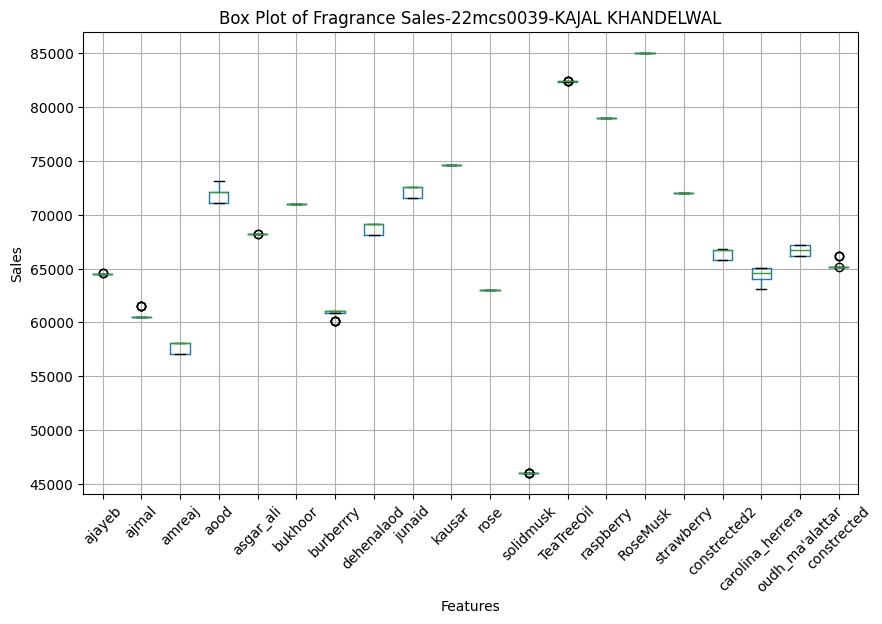

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Data = {
     'ajayeb': [64558, 64556, 64543, 64543, 64541, 64543, 64543, 64543, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541],
    'ajmal': [60502, 60489, 61485, 60487, 61485, 61513, 60515, 60500, 60500, 60487, 60500, 61526, 60528, 60528, 60528, 60472, 60472, 60472, 60461, 60515],
    'amreaj': [57040, 57040, 57040, 58041, 58041, 58041, 58041, 57042, 57042, 58043, 58043, 58043, 58043, 58043, 58043, 58043, 57042, 57042, 57042, 58041],
    'aood': [71083, 72087, 71091, 71095, 71099, 72103, 71099, 72099, 72099, 73098, 72094, 73094, 72091, 72091, 72091, 72091, 72091, 72091, 71095, 71095],
    'asgar_ali': [68209, 68209, 68216, 68216, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68230, 68230, 68230, 68230, 68230, 68230, 68230],
    'bukhoor': [71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046],
    'burberrry': [61096, 61096, 60093, 60092, 60093, 60093, 60093, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096],
    'dehenalaod': [68132, 69137, 69137, 68137, 68137, 69142, 69142, 68137, 68137, 68137, 68137, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'constrected2': [66805, 65808, 65808, 66805, 65808, 65785, 65785, 65785, 65785, 66782, 65765, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763, 66763],
    'carolina_herrera': [63076, 63072, 64072, 64068, 64065, 64065, 64064, 64061, 64061, 65064, 64061, 65064, 65061, 65061, 65061, 65061, 65061, 65061, 65061, 65061],
    'oudh_ma\'alattar': [67197, 67197, 67204, 67210, 67204, 67204, 67210, 67210, 67210, 67210, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66198, 66211, 66198],
    'constrected': [65151, 66151, 66146, 65146, 65146, 66146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146, 65146]
}

# Create a DataFrame from the fragrance_sales dictionary
df = pd.DataFrame(Data)

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of Fragrance Sales-22mcs0039-KAJAL KHANDELWAL')
plt.xlabel('Features')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


**Histogram**

**A histogram is a graphical representation of the distribution of a dataset. It is a way to visualize the frequency or count of data points falling into specific intervals, known as bins. The x-axis of a histogram represents the range of values in the dataset, divided into equal-sized bins, and the y-axis represents the frequency or count of data points in each bin.**

<Figure size 1000x600 with 0 Axes>

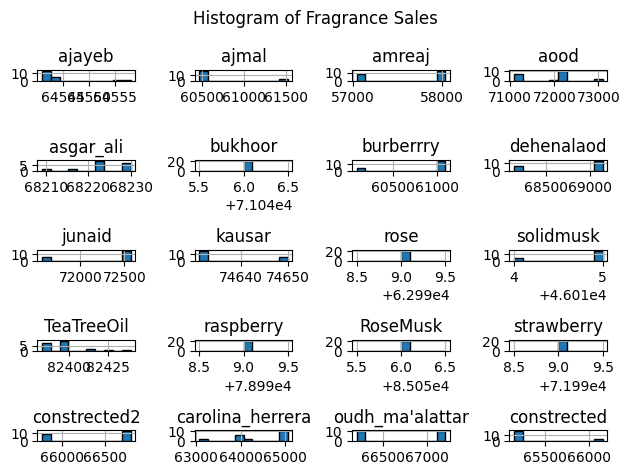

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the fragrance_sales dictionary
df = pd.DataFrame(Data)

# Create a histogram
plt.figure(figsize=(10, 6))
df.hist(bins=10, edgecolor='black')
plt.suptitle('Histogram of Fragrance Sales')
plt.tight_layout()
plt.show()


**Pairwise Scatter Plot**

**A pairwise scatter plot, also known as a scatter matrix or scatterplot matrix, is a grid of scatter plots that visualizes the relationships between multiple variables in a dataset. It allows us to examine the pairwise correlations and patterns between variables by plotting each variable against every other variable.**

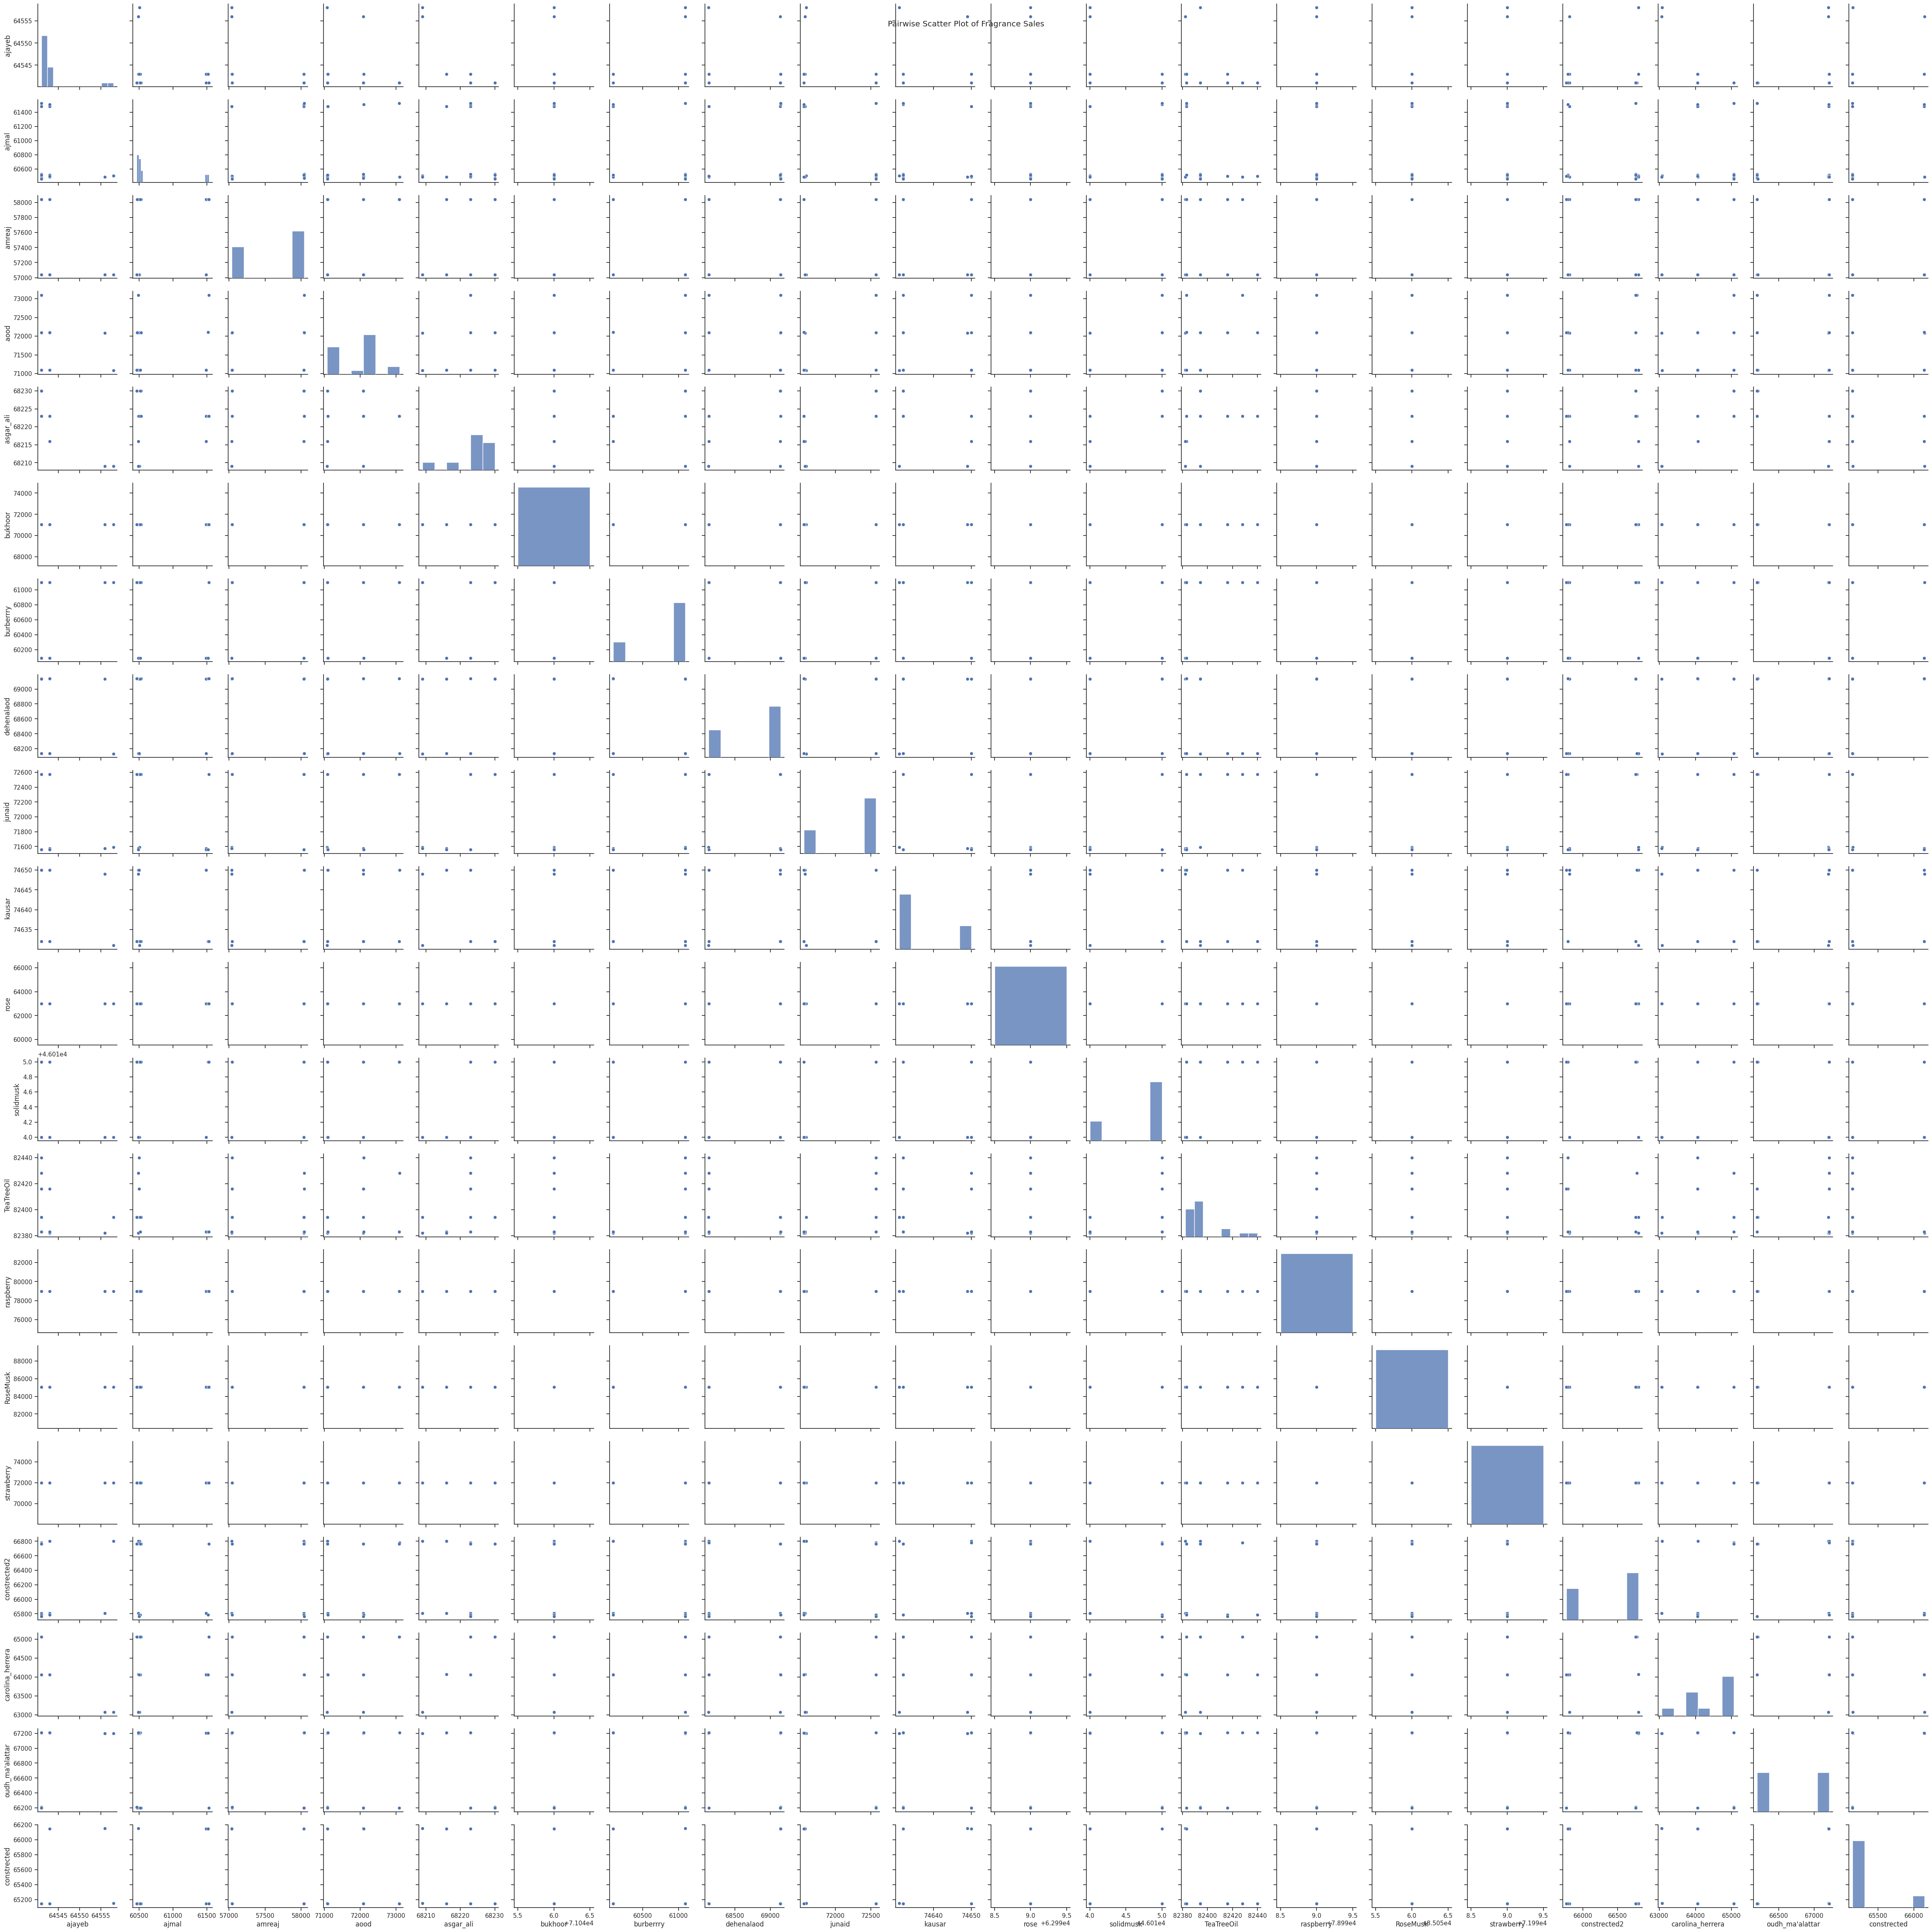

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(Data)

# Create a pairwise scatter plot
sns.set(style="ticks")
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plot 22MCS0039 -KAJAL KHANDELWAL)
plt.show()



**Correlation Heatmap**

**A correlation heatmap is a graphical representation of the correlation matrix, which shows the pairwise correlations between variables in a dataset. It uses color-coded cells to indicate the strength and direction of the correlations between variables.**

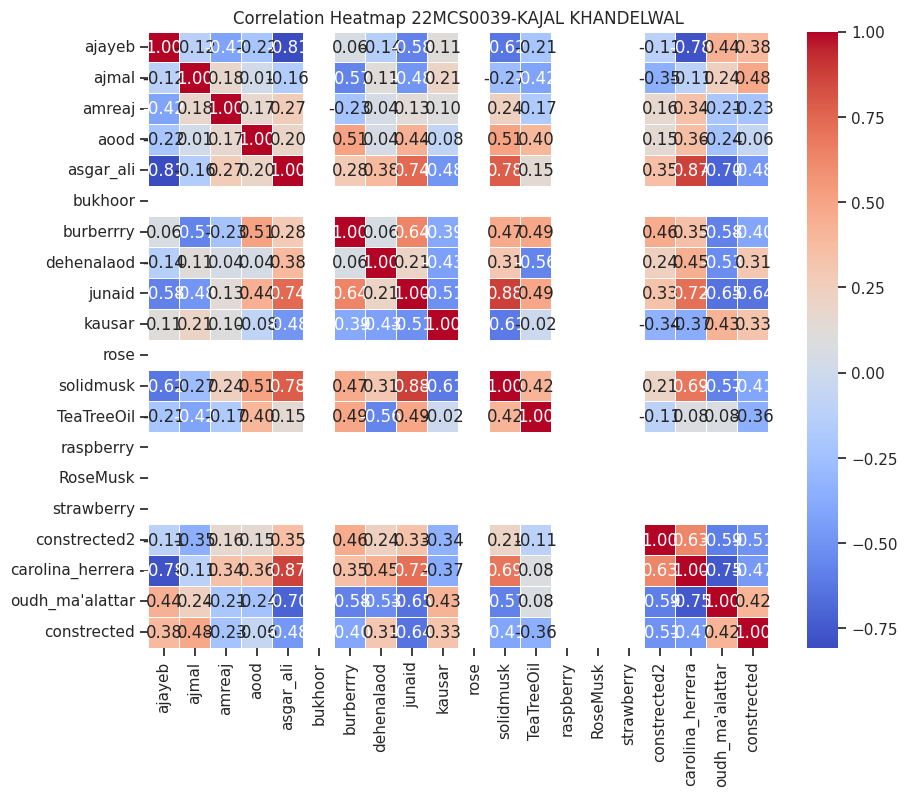

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the fragrance_sales dictionary
df = pd.DataFrame(Data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap 22MCS0039-KAJAL KHANDELWAL')
plt.show()


**Bar Chart**

**A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.**

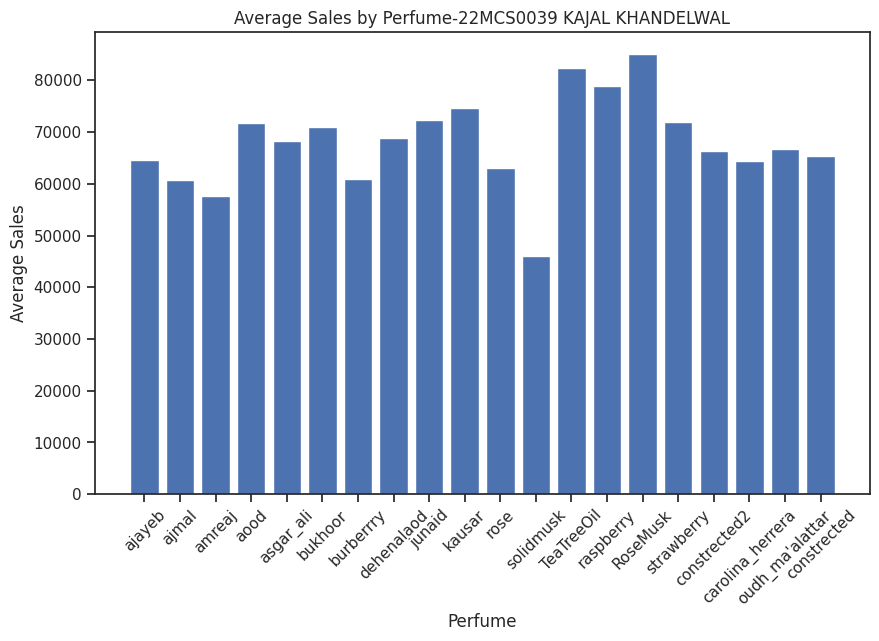

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(Data)

# Calculate the average sales for each fragrance
avg_sales = df.mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales.index, avg_sales.values)
plt.xlabel('Perfume')
plt.ylabel('Average Sales')
plt.title('Average Sales by Perfume-22MCS0039 KAJAL KHANDELWAL')
plt.xticks(rotation=45)
plt.show()


**Line Chart**

**A line chart is a graphical representation of an asset's historical price action that connects a series of data points with a continuous line**

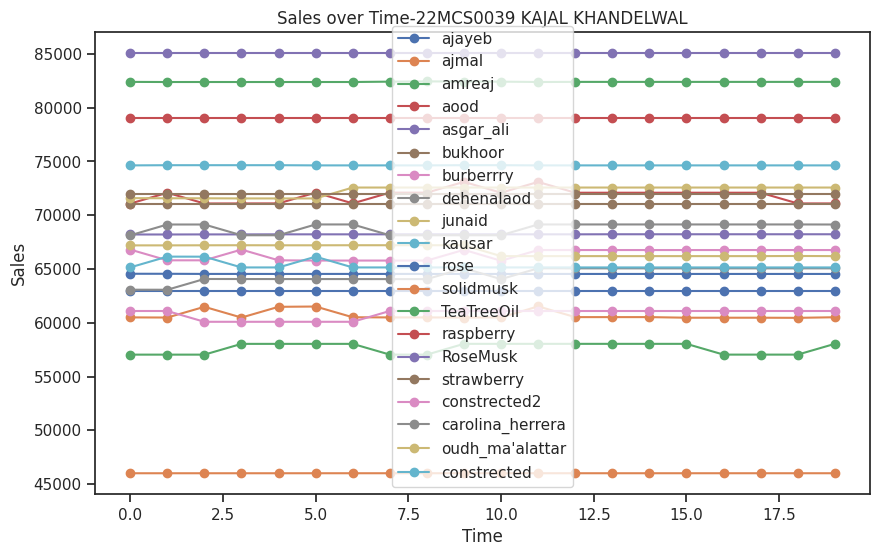

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(Data)

# Create a line chart
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales over Time-22MCS0039 KAJAL KHANDELWAL')
plt.legend()
plt.show()


**Density Plot**

**A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise.**

<ipython-input-79-e2673300a969>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], label=column)
<ipython-input-79-e2673300a969>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], label=column)
<ipython-input-79-e2673300a969>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], label=column)
<ipython-input-79-e2673300a969>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], label=column)
<ipython-input-79-e2673300a969>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], label=column)


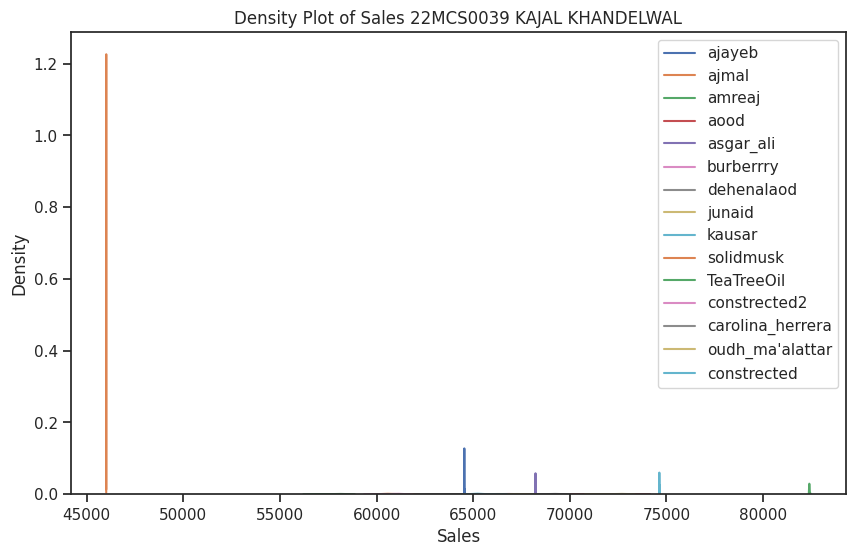

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(Data)

# Create a density plot
plt.figure(figsize=(10, 6))
for column in df.columns:
    sns.kdeplot(df[column], label=column)

plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Density Plot of Sales 22MCS0039 KAJAL KHANDELWAL')
plt.legend()
plt.show()


**Pie Chart**

**A pie chart is a circular statistical graphic that is divided into sectors, where each sector represents a proportion or percentage of a whole. It is used to visualize the distribution of a categorical variable and show the relative sizes of different categories.** 

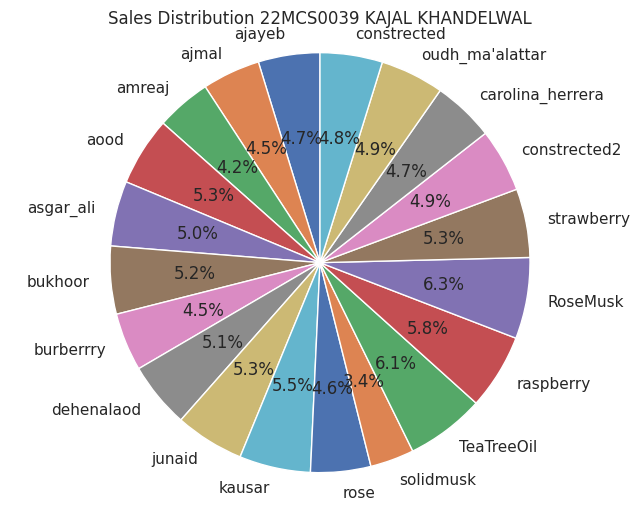

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(Data)

# Calculate the total sales for each fragrance
total_sales = df.sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sales Distribution 22MCS0039 KAJAL KHANDELWAL')

plt.show()


**Result**

**Calcultate Precision,	Recall,	F1	Score,	
Accuracy,	TPR,	FPR,	RoC	curve**

**Since the dataset provided does not have a target variable explicitly specified, we can assume a scenario where we want to classify the data points into a positive class and all other classes. In this case, we can choose one of the columns from the dataset as the positive class and consider all other columns as the negative class.**

**Let's assume we want to classify the data points into the 'ajayeb' column as the positive class and the remaining columns as the negative class. We can proceed with this assumption and calculate the performance metrics and ROC curve based on this classification.**

Precision: 0.05263157894736842
Recall: 1.0
F1 Score: 0.1
Accuracy: 0.05263157894736842


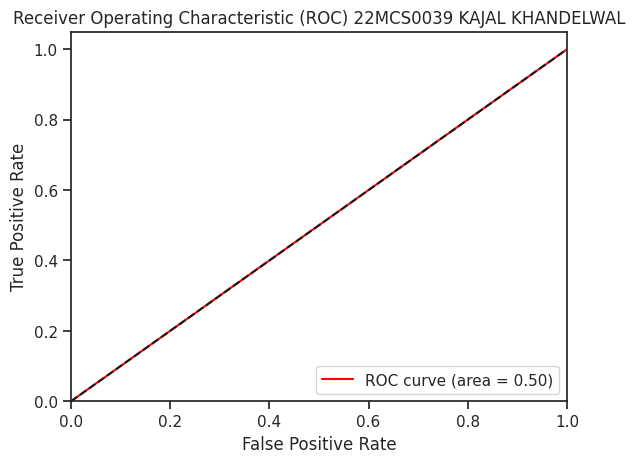

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

# Define the dataset
data = {
    'ajayeb': [64558, 64556, 64543, 64543, 64541, 64543, 64543, 64543, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541, 64541],
    'ajmal': [60502, 60489, 61485, 60487, 61485, 61513, 60515, 60500, 60500, 60487, 60500, 61526, 60528, 60528, 60528, 60472, 60472, 60472, 60461, 60515],
    'amreaj': [57040, 57040, 57040, 58041, 58041, 58041, 58041, 57042, 57042, 58043, 58043, 58043, 58043, 58043, 58043, 58043, 57042, 57042, 57042, 58041],
    'aood': [71083, 72087, 71091, 71095, 71099, 72103, 71099, 72099, 72099, 73098, 72094, 73094, 72091, 72091, 72091, 72091, 72091, 72091, 71095, 71095],
    'asgar_ali': [68209, 68209, 68216, 68216, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68223, 68230, 68230, 68230, 68230, 68230, 68230, 68230],
    'bukhoor': [71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046, 71046],
    'burberrry': [61096, 61096, 60093, 60092, 60093, 60093, 60093, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096, 61096],
    'dehenalaod': [68132, 69137, 69137, 68137, 68137, 69142, 69142, 68137, 68137, 68137, 68137, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69142, 69136],
    'junaid': [71590, 71575, 71574, 71560, 71560, 71559, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573, 72573],
    'kausar': [74631, 74649, 74650, 74650, 74650, 74632, 74632, 74632, 74632, 74650, 74650, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632, 74632],
    'rose': [62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999, 62999],
    'solidmusk': [46014, 46014, 46014, 46014, 46014, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015, 46015],
    'TeaTreeOil': [82394, 82382, 82383, 82382, 82383, 82383, 82383, 82416, 82440, 82428, 82416, 82383, 82394, 82394, 82394, 82394, 82394, 82394, 82394, 82394],
    'raspberry': [78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999, 78999],
    'RoseMusk': [85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056, 85056],
    'strawberry': [71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999, 71999],
    'surrati': [65247, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249, 65249],
    'vanilla': [67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097, 67097],
    'whiteoud': [66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023, 66023]
}

# Select positive class and negative class columns
positive_class = 'ajayeb'
negative_class = [col for col in data if col != positive_class]

# Prepare positive and negative class labels
y_positive = data[positive_class]
y_negative = np.concatenate([data[col] for col in negative_class])

# Create the true labels (1 for positive class, 0 for negative class)
y_true = np.concatenate([np.ones(len(y_positive)), np.zeros(len(y_negative))])

# Create the predicted labels (assuming all data points belong to the positive class)
y_pred = np.concatenate([np.ones(len(y_positive)), np.ones(len(y_negative))])

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) 22MCS0039 KAJAL KHANDELWAL')
plt.legend(loc="lower right")
plt.show()
